# Cat and Dog DataSet

- Cats and Dogs dataset to train a DL model
- [캐글](https://www.kaggle.com)의 [Cat and Dog](https://www.kaggle.com/tongpython/cat-and-dog)


## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob

2021-09-14 05:31:52.518772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!unzip -q -d 'cat_and_dog' '/content/drive/MyDrive/archive.zip'

In [ ]:
!pwd

## load Data

In [44]:
## in training_set directory
training_cats = glob.glob('../input/cat-and-dog/training_set/training_set/cats/*.jpg')
training_dogs = glob.glob('../input/cat-and-dog/training_set/training_set/dogs/*.jpg')

print(len(training_cats), len(training_dogs))

4000 4005


In [45]:
## in test_set directory
test_cats = glob.glob('../input/cat-and-dog/test_set/test_set/cats/*.jpg')
test_dogs = glob.glob('../input/cat-and-dog/test_set/test_set/dogs/*.jpg')

print(len(test_cats), len(test_dogs))

1011 1012


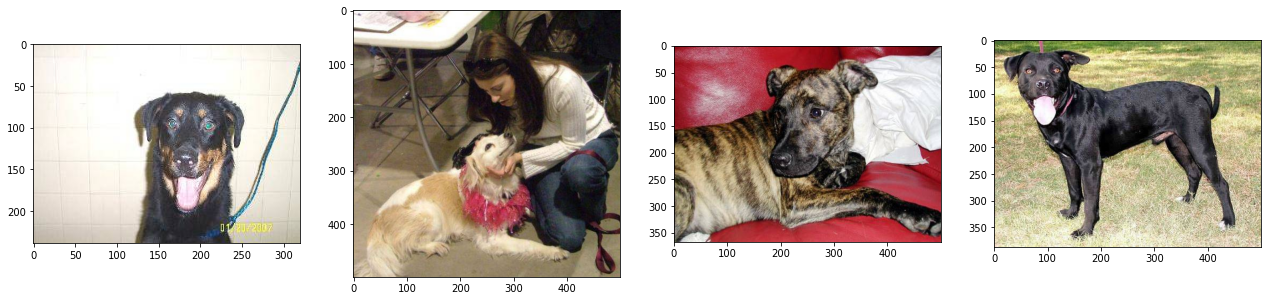

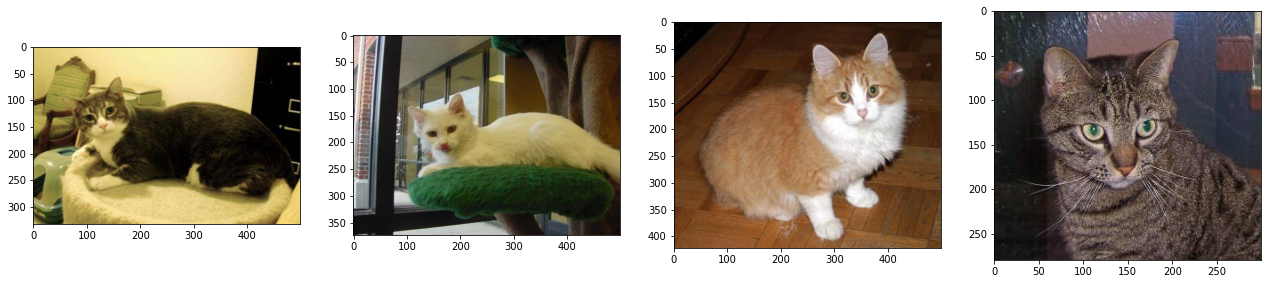

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
dog_images = training_dogs[:4]
for i in range(4):
    image = cv2.cvtColor(cv2.imread(dog_images[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
cat_images = training_cats[:4]
for i in range(4):
    image = cv2.cvtColor(cv2.imread(cat_images[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)

## Preprocess Data (from dataframe)

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, MaxPooling3D, BatchNormalization, Activation

from sklearn.model_selection import train_test_split

In [48]:
test_cats[:3] # only file name

['../input/cat-and-dog/test_set/test_set/cats/cat.4414.jpg',
 '../input/cat-and-dog/test_set/test_set/cats/cat.4420.jpg',
 '../input/cat-and-dog/test_set/test_set/cats/cat.4880.jpg']

In [52]:
train_paths = training_cats + training_dogs
train_labels = ['CAT' for _ in range(len(training_cats))] + ['DOG' for _ in range(len(training_dogs))]

In [53]:
pd.set_option('display.max_colwidth', 200) # 200글자 제한

In [54]:
train_df = pd.DataFrame({'path':train_paths, 'label':train_labels})

In [55]:
test_paths = test_cats + test_dogs
test_labels = ['CAT' for _ in range(len(test_cats))] + ['DOG' for _ in range(len(test_dogs))]

test_df = pd.DataFrame({'path':test_paths, 'label':test_labels})

In [56]:
train_df['label'].value_counts()

DOG    4005
CAT    4000
Name: label, dtype: int64

In [57]:
test_df['label'].value_counts()

DOG    1012
CAT    1011
Name: label, dtype: int64

In [58]:
# train_test_split에 dataframe도 들어갈 수 있기에 데이터 프레임으로 검증용 데이터를 만들 수 있다.
train_df, valid_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label']) #리스트가 아닌 데이터 프레임에서는 return값이 4개가 아닌 하나다.

In [59]:
train_df.head(5)

,path,label
393,../input/cat-and-dog/training_set/training_set/cats/cat.24.jpg,CAT
4933,../input/cat-and-dog/training_set/training_set/dogs/dog.642.jpg,DOG
5421,../input/cat-and-dog/training_set/training_set/dogs/dog.2834.jpg,DOG
7861,../input/cat-and-dog/training_set/training_set/dogs/dog.2140.jpg,DOG
2220,../input/cat-and-dog/training_set/training_set/cats/cat.3992.jpg,CAT


In [60]:
test_df.head(5)

,path,label
0,../input/cat-and-dog/test_set/test_set/cats/cat.4414.jpg,CAT
1,../input/cat-and-dog/test_set/test_set/cats/cat.4420.jpg,CAT
2,../input/cat-and-dog/test_set/test_set/cats/cat.4880.jpg,CAT
3,../input/cat-and-dog/test_set/test_set/cats/cat.4326.jpg,CAT
4,../input/cat-and-dog/test_set/test_set/cats/cat.4620.jpg,CAT


In [61]:
print(train_df.shape, test_df.shape)
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

(6404, 2) (2023, 2)
DOG    3204
CAT    3200
Name: label, dtype: int64
DOG    1012
CAT    1011
Name: label, dtype: int64


In [62]:
training_cats[:5] + training_dogs[:5]

['../input/cat-and-dog/training_set/training_set/cats/cat.3498.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.891.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.2842.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.1.jpg',
 '../input/cat-and-dog/training_set/training_set/cats/cat.115.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3443.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.375.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3259.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.790.jpg']

In [63]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
train_generator = ImageDataGenerator(horizontal_flip = True, rescale=1/255.0) #Scale 조정 scale을 재조정하는데 255.0으로 나눌 것이다.
train_generator_iterator = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path',
                                                               y_col='label',
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE,
                                                               class_mode='binary') #binary label Encoding

# categorical, sparse, binary로 label을 encoding하는 것에 따라 loss도 바뀐다. ~~~_crossentropy 이런 모습의 loss

Found 6404 validated image filenames belonging to 2 classes.


In [64]:
valid_generator = ImageDataGenerator(rescale=1/255.0)
valid_generator_iterator = train_generator.flow_from_dataframe(dataframe=valid_df,  x_col='path',
                                                              y_col='label',
                                                              target_size=(IMAGE_SIZE, IMAGE_SIZE),batch_size=BATCH_SIZE,
                                                              class_mode='binary')

Found 1601 validated image filenames belonging to 2 classes.


In [65]:
test_generator = ImageDataGenerator(rescale=1/255.0)
test_generator_iterator = train_generator.flow_from_dataframe(dataframe=test_df,  x_col='path',
                                                              y_col='label',
                                                              target_size=(IMAGE_SIZE, IMAGE_SIZE),batch_size=BATCH_SIZE,
                                                              class_mode='binary')

Found 2023 validated image filenames belonging to 2 classes.


* fetch some data

In [66]:
image_array, label_array = next(train_generator_iterator)

In [67]:
image_array.shape

(32, 224, 224, 3)

In [68]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, MaxPooling3D, BatchNormalization, Activation, GlobalAveragePooling2D

#### VGG16 Pre_trained Model 이용하기

In [89]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(include_top=False) #True가 default

58892288/58889256 [==============================] - 0s 0us/step


In [82]:
def build_vgg16():
    tf.keras.backend.clear_session()

    input_tensor = Input(shape=(224, 224, 3))
    # Block 1
    x = Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1')(x)
    x = Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv1')(x)
    x = Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv2')(x)
    x = Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv1')(x)
    x = Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv2')(x)
    x = Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv1')(x)
    x = Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv2')(x)
    x = Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    
    x = Flatten()(x) 
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(1000, activation='relu', name='fc3')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(1000, activation='relu', name='fc4')(x)   
    x = Dropout(rate=0.5)(x)
    x = Dropout(rate=0.5)(x)   
    x = Dense(300, activation='relu', name='fc5')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu', name='fc6')(x)   
    x = Dropout(rate=0.5)(x)
    
    output = Dense(1, activation="sigmoid")(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model

In [83]:
model = build_vgg16()

In [90]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Compile Model, Train

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1) 
reducelr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, mode='min', verbose=1)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

In [92]:
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator_iterator, epochs=30, validation_data=valid_generator_iterator, callbacks=[checkpoint_cb, reducelr_cb, early_stopping_cb])

Epoch 1/30


InvalidArgumentError:  Incompatible shapes: [32,7,7] vs. [32,1]
	 [[node Equal (defined at tmp/ipykernel_41/909996256.py:2) ]] [Op:__inference_train_function_42855]

Function call stack:
train_function


In [32]:
model.evaluate(test_generator_iterator)

64/64 [==============================] - 16s 243ms/step - loss: 1.1563 - accuracy: 0.6317


[1.156326413154602, 0.6317350268363953]